In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load datasets
ev_population = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
buying_behaviour = pd.read_csv('/content/Indian_automobile_buying_behaviour.csv')
charging_stations = pd.read_csv('/content/ev-charging-stations-india.csv')


In [ ]:
# Display columns and basic info
print("EV Population Data:")
print(ev_population.info())


EV Population Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         138779 non-null  object 
 1   County                                             138776 non-null  object 
 2   City                                               138776 non-null  object 
 3   State                                              138779 non-null  object 
 4   Postal Code                                        138776 non-null  float64
 5   Model Year                                         138779 non-null  int64  
 6   Make                                               138779 non-null  object 
 7   Model                                              138493 non-null  object 
 8   Electric Vehicle Type                              138

In [ ]:
print("\nIndian Buying Behaviour Data:")
print(buying_behaviour.info())



Indian Buying Behaviour Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB
None


In [ ]:
print("\nEV Charging Stations Data:")
print(charging_stations.info())



EV Charging Stations Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB
None


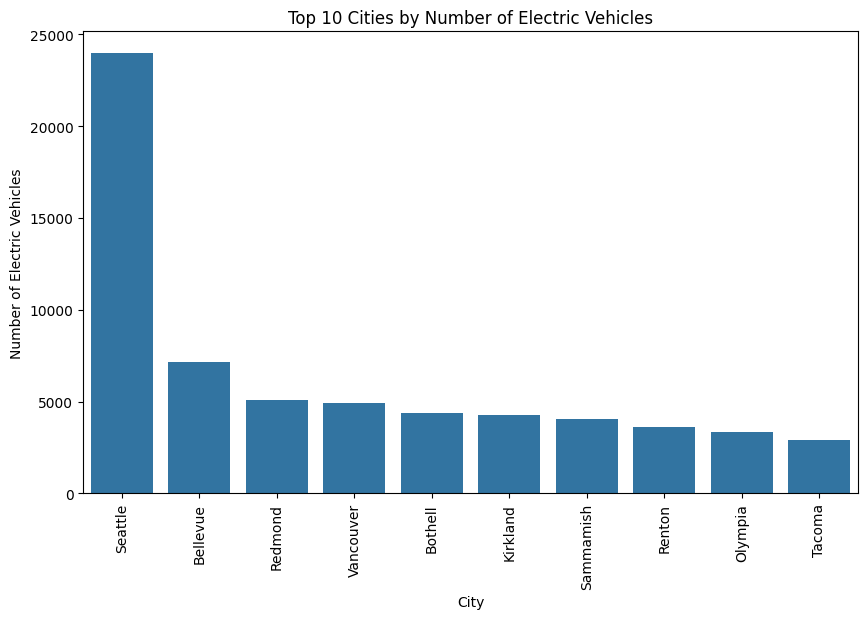

In [ ]:
# --------------------------------------------
# Problem Statement 1: EV Market Segmentation
# --------------------------------------------

top_cities = ev_population['City'].value_counts().head(10)

# Plot the distribution for only the top cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=90)
plt.title('Top 10 Cities by Number of Electric Vehicles')
plt.ylabel('Number of Electric Vehicles')
plt.xlabel('City')
plt.show()


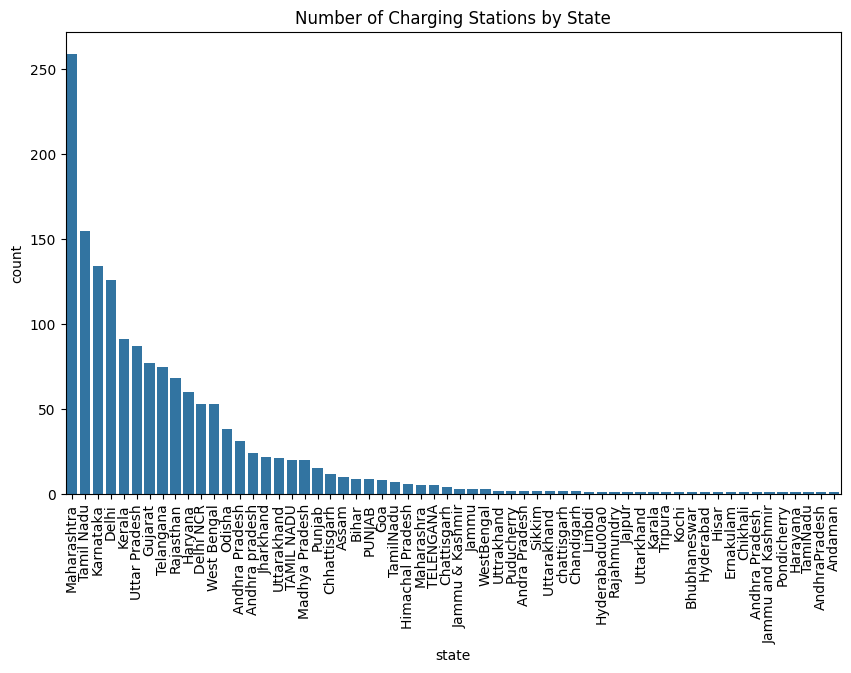

In [ ]:
# Plot distribution of charging stations by State
plt.figure(figsize=(10, 6))
sns.countplot(data=charging_stations, x='state', order=charging_stations['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Charging Stations by State')
plt.show()


In [ ]:
# Descriptive statistics of demographics
print(buying_behaviour[['Age', 'Salary', 'Total Salary', 'Price']].describe())


             Age        Salary  Total Salary         Price
count  99.000000  9.900000e+01  9.900000e+01  9.900000e+01
mean   36.313131  1.736364e+06  2.270707e+06  1.194040e+06
std     6.246054  6.736217e+05  1.050777e+06  4.376955e+05
min    26.000000  2.000000e+05  2.000000e+05  1.100000e+05
25%    31.000000  1.300000e+06  1.550000e+06  8.000000e+05
50%    36.000000  1.600000e+06  2.100000e+06  1.200000e+06
75%    41.000000  2.200000e+06  2.700000e+06  1.500000e+06
max    51.000000  3.800000e+06  5.200000e+06  3.000000e+06


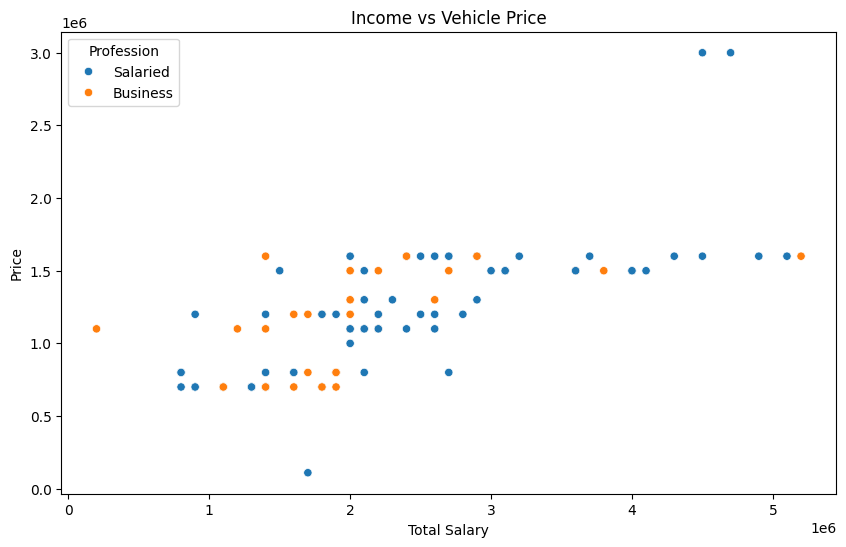

In [ ]:
# Income vs Vehicle Price Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=buying_behaviour, x='Total Salary', y='Price', hue='Profession')
plt.title('Income vs Vehicle Price')
plt.show()


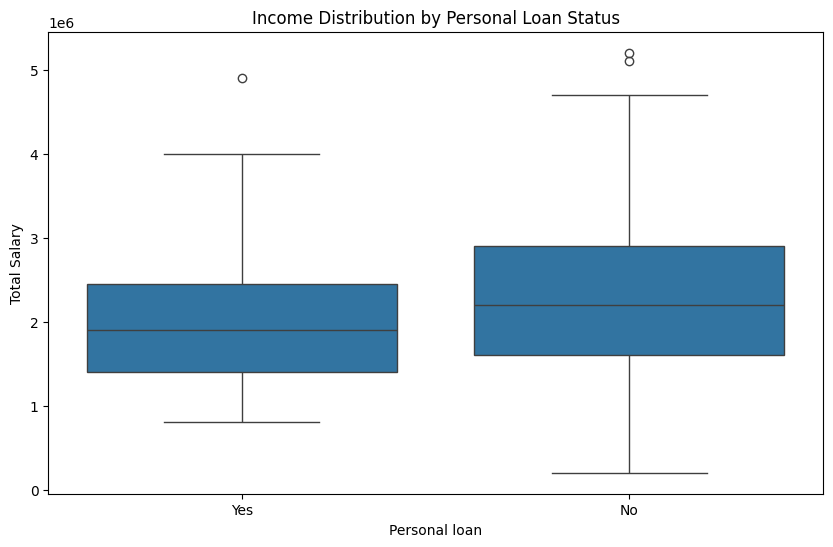

In [ ]:
# Boxplot: Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=buying_behaviour, x='Personal loan', y='Total Salary')
plt.title('Income Distribution by Personal Loan Status')
plt.show()


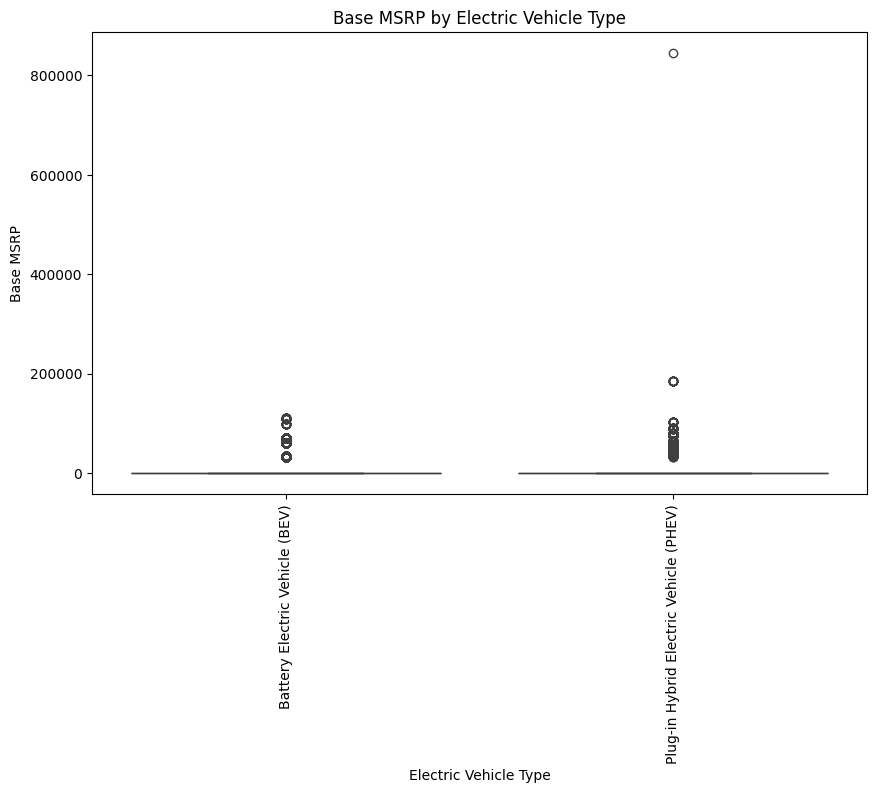

In [ ]:
# Base MSRP by Electric Vehicle Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=ev_population, x='Electric Vehicle Type', y='Base MSRP')
plt.xticks(rotation=90)
plt.title('Base MSRP by Electric Vehicle Type')
plt.show()


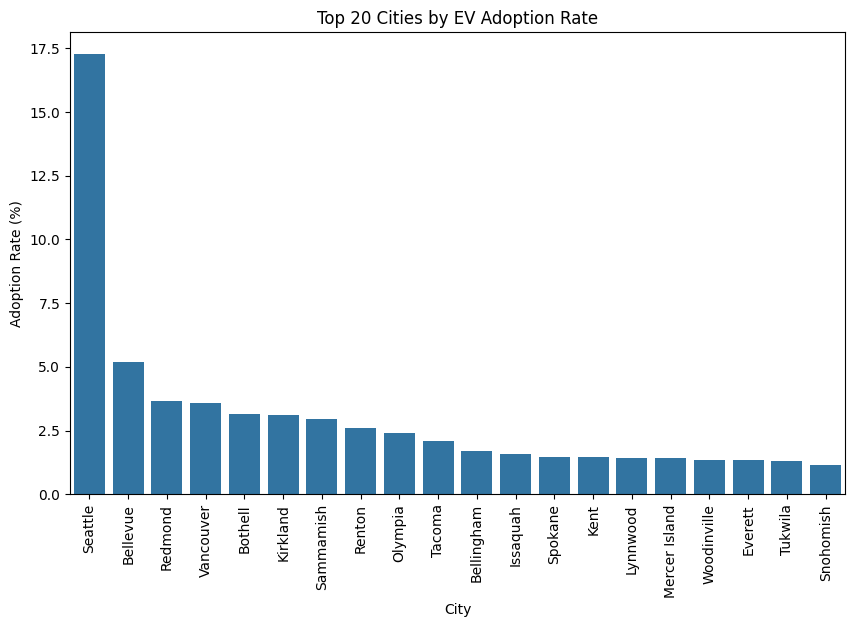

In [ ]:
# EV Adoption Rate by City
adoption_rate = ev_population['City'].value_counts() / len(ev_population) * 100

# Select the top 10 cities by number of EVs for plotting
top_cities_adoption_rate = adoption_rate.head(20)

# Plot the EV adoption rate for the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_adoption_rate.index, y=top_cities_adoption_rate.values)
plt.xticks(rotation=90)
plt.title('Top 20 Cities by EV Adoption Rate')
plt.ylabel('Adoption Rate (%)')
plt.xlabel('City')
plt.show()

In [ ]:
# Correlation with demographics
print("Correlation between Salary and Price:")
print(buying_behaviour[['Total Salary', 'Price']].corr())


Correlation between Salary and Price:
              Total Salary     Price
Total Salary      1.000000  0.717442
Price             0.717442  1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


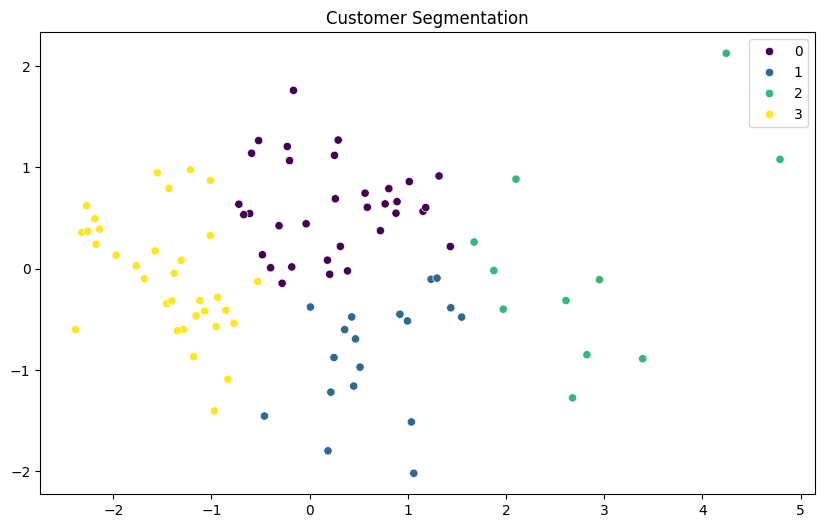

In [ ]:
# --------------------------------------------
# Clustering: Segmenting Buyers (using KMeans)
# --------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(buying_behaviour[['Age', 'Total Salary', 'Price']].dropna())

# PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to DataFrame
buying_behaviour['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segmentation')
plt.show()


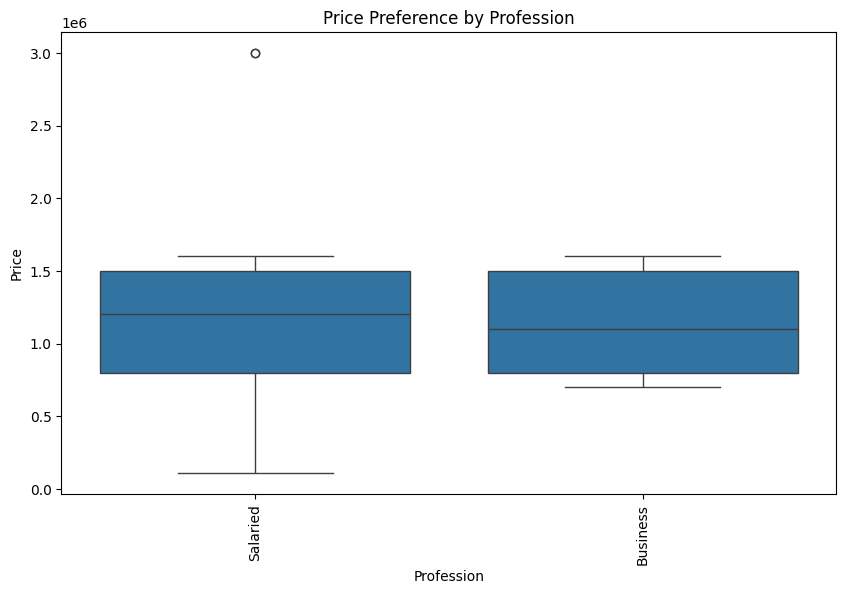

In [ ]:
# --------------------------------------------
# Problem Statement 2: Online Vehicle Booking Segmentation
# --------------------------------------------

# Psychographic Segmentation: Income and Price Preferences
plt.figure(figsize=(10, 6))
sns.boxplot(data=buying_behaviour, x='Profession', y='Price')
plt.xticks(rotation=90)
plt.title('Price Preference by Profession')
plt.show()


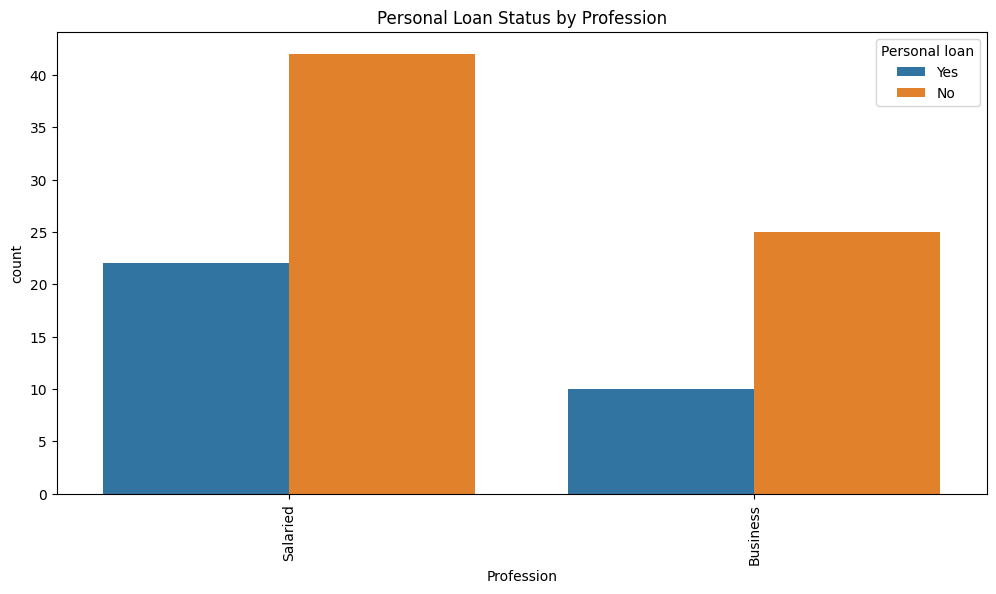

In [ ]:
# Behavioural Segmentation: Profession vs. Personal Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=buying_behaviour, x='Profession', hue='Personal loan')
plt.xticks(rotation=90)
plt.title('Personal Loan Status by Profession')
plt.show()


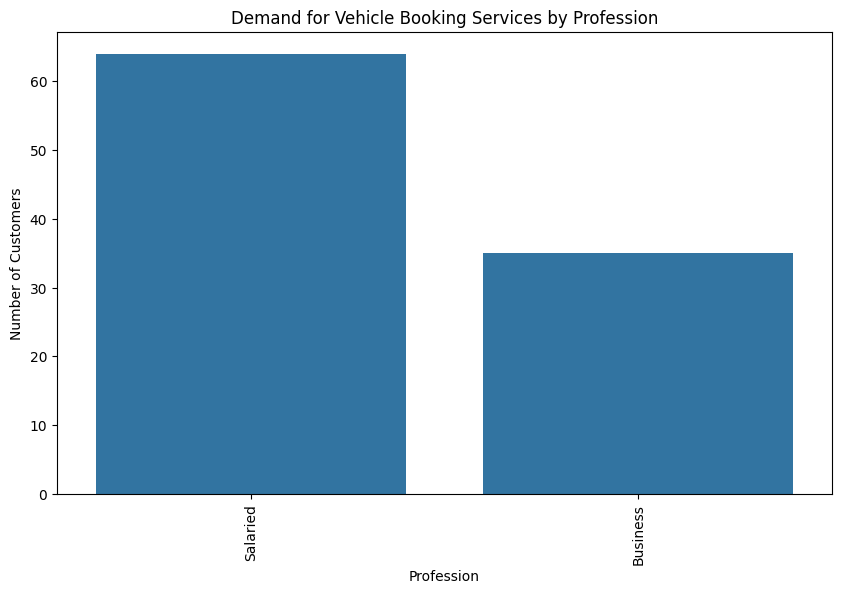

In [ ]:
# --------------------------------------------
# Profit Estimation and Target Segment Strategy (for Online Vehicle Booking)
# --------------------------------------------

# 1. Analyze demand for vehicle booking based on Profession and Make

# Count the number of people in each profession and vehicle make category
profession_counts = buying_behaviour['Profession'].value_counts()
make_counts = buying_behaviour['Make'].value_counts()

# Plot the demand by Profession
plt.figure(figsize=(10, 6))
sns.barplot(x=profession_counts.index, y=profession_counts.values)
plt.xticks(rotation=90)
plt.title('Demand for Vehicle Booking Services by Profession')
plt.ylabel('Number of Customers')
plt.show()


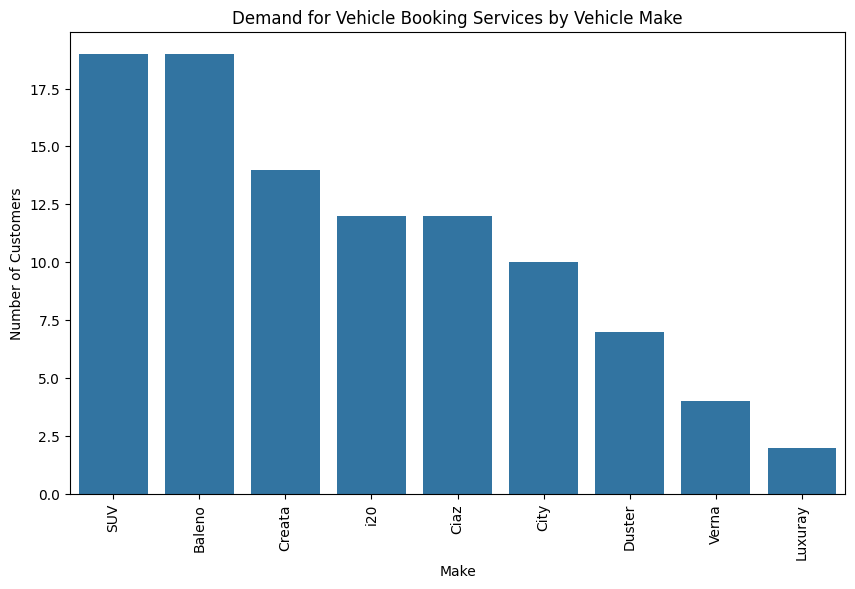

In [ ]:
# Plot the demand by Vehicle Make
plt.figure(figsize=(10, 6))
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.xticks(rotation=90)
plt.title('Demand for Vehicle Booking Services by Vehicle Make')
plt.ylabel('Number of Customers')
plt.show()


Profit potential by Profession:
Profession
Business    3920000.0
Salaried    7901000.0
Name: Potential Profit, dtype: float64

Profit potential by Vehicle Make:
Make
Baleno     1340000.0
Ciaz       1310000.0
City       1200000.0
Creata     2100000.0
Duster      920000.0
Luxuray     600000.0
SUV        3030000.0
Verna       361000.0
i20         960000.0
Name: Potential Profit, dtype: float64


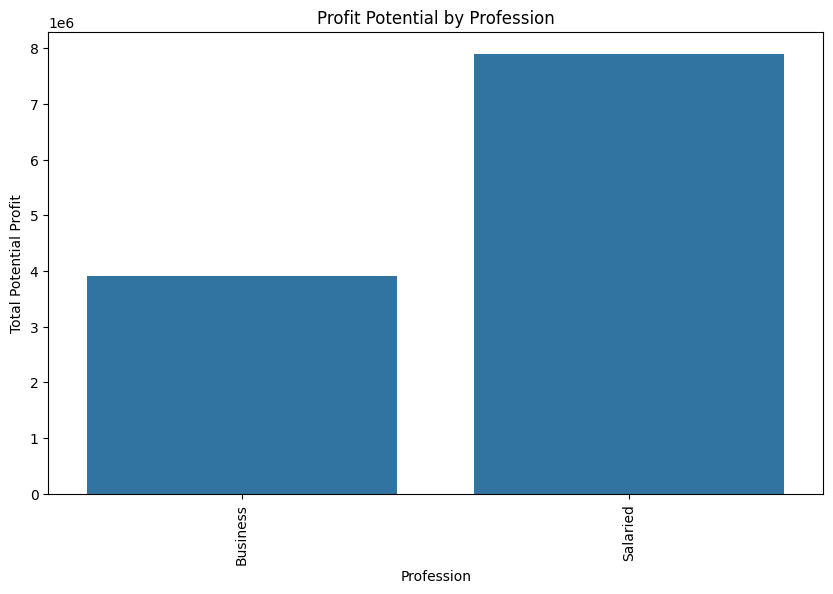

In [ ]:
# 2. Estimate profit potential based on total salary and vehicle price

# Calculate potential profit for each customer
buying_behaviour['Potential Profit'] = buying_behaviour['Price'] * 0.1  # Assume 10% of vehicle price as profit margin

# Sum up the potential profit for each segment
profit_by_profession = buying_behaviour.groupby('Profession')['Potential Profit'].sum()
profit_by_make = buying_behaviour.groupby('Make')['Potential Profit'].sum()

# Display profit potential by profession
print("Profit potential by Profession:")
print(profit_by_profession)

# Display profit potential by vehicle make
print("\nProfit potential by Vehicle Make:")
print(profit_by_make)

# Plot profit potential by Profession
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_profession.index, y=profit_by_profession.values)
plt.xticks(rotation=90)
plt.title('Profit Potential by Profession')
plt.ylabel('Total Potential Profit')
plt.show()


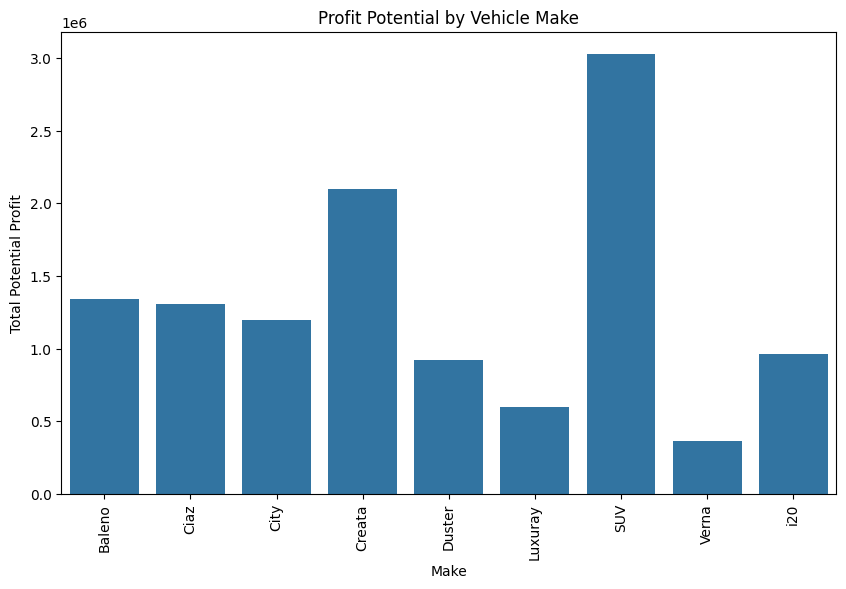

In [ ]:
# Plot profit potential by Vehicle Make
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_make.index, y=profit_by_make.values)
plt.xticks(rotation=90)
plt.title('Profit Potential by Vehicle Make')
plt.ylabel('Total Potential Profit')
plt.show()



Underserved segments based on Profession:
Profession
Business    12
Salaried    29
dtype: int64


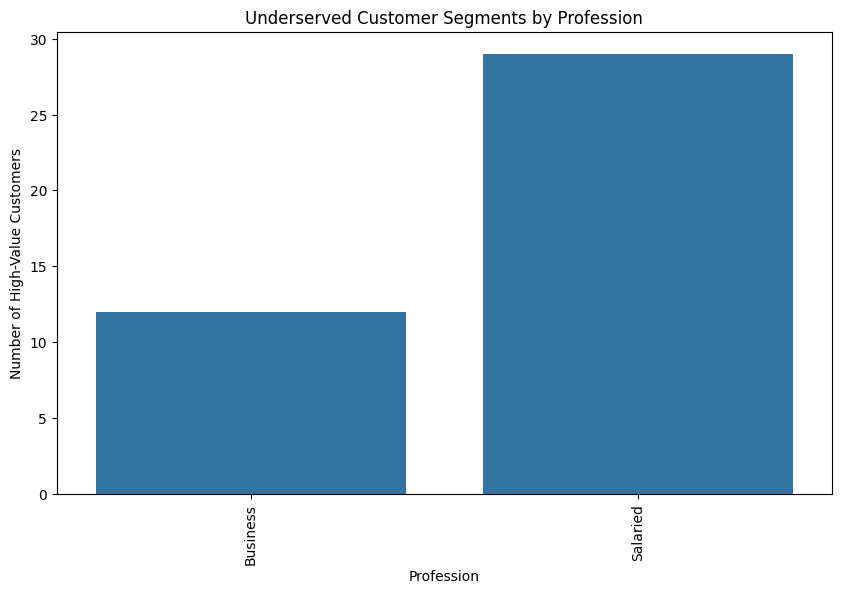

In [ ]:
# 3. Identifying underserved segments based on total salary and vehicle price
# Target underserved customer segments where price is high and number of customers is low

high_value_customers = buying_behaviour[buying_behaviour['Price'] > buying_behaviour['Price'].median()]
underserved_segments = high_value_customers.groupby('Profession').size().sort_values(ascending=True)

print("\nUnderserved segments based on Profession:")
print(underserved_segments)

# Plot underserved segments
plt.figure(figsize=(10, 6))
sns.barplot(x=underserved_segments.index, y=underserved_segments.values)
plt.xticks(rotation=90)
plt.title('Underserved Customer Segments by Profession')
plt.ylabel('Number of High-Value Customers')
plt.show()